In [1]:
from glob import glob
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import xarray

In [3]:
from tqdm import tqdm
tqdm.pandas()

In [4]:
DATA_DIR = "../data/raw/"

In [5]:
geojsons = glob(DATA_DIR + "**/**/*.geojson", recursive=True)
images = glob(DATA_DIR + "**/**/*.tif", recursive=True)
len(geojsons)
len(images)

21

In [5]:
dfs = []
for geojson in geojsons:
    df = gpd.read_file(geojson)
    df["subset"] = "train" if "train" in geojson else "test"
    df["path"] = geojson
    # Projection of kmz
    #lon = df.geometry[0].exterior.coords[:][0][0]
    #lat = df.geometry[0].exterior.coords[:][0][1]
    #epsg = int(32700 - np.round((45 + lat)/90)*100 + np.round((183 + lon)/6))
    #df['CRS'] = [{'init': 'epsg:%d' % epsg}]*len(df)
    df = df.to_crs({'init': 'epsg:32618'})
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df["place"] = df["path"].apply(lambda x: x.split("/")[1])
df["zone"] = df["path"].apply(lambda x: x.split("/")[2])
df["area"] = df["geometry"].area

/home/edu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [6]:
df.sample(5)

,geometry,id,path,roof_material,subset,verified,place,zone,area
18837,"POLYGON ((593389.036 503250.258, 593391.669 50...",7a48624c,stac/colombia/borde_rural/test-borde_rural.geo...,NaN,test,NaN,colombia,borde_rural,15.977541
75171,"POLYGON ((593361.243 502857.011, 593365.083 50...",7a32f254,stac/colombia/borde_rural/train-borde_rural.ge...,irregular_metal,train,True,colombia,borde_rural,17.162649
38489,"POLYGON ((2038232.671 1584094.666, 2038232.161...",7a33fbb8,stac/st_lucia/dennery/train-dennery.geojson,healthy_metal,train,True,st_lucia,dennery,48.530672
5469,"POLYGON ((2027084.665 1594645.412, 2027093.163...",7a38fbe0,stac/st_lucia/castries/train-castries.geojson,healthy_metal,train,False,st_lucia,castries,56.411424
27537,"POLYGON ((592376.880 504559.808, 592386.417 50...",7a41272a,stac/colombia/borde_soacha/train-borde_soacha....,irregular_metal,train,True,colombia,borde_soacha,35.147419


In [7]:
df.head()

,geometry,id,path,roof_material,subset,verified,place,zone,area
0,"POLYGON ((2030877.666 1601737.560, 2030859.207...",7a262f60,stac/st_lucia/gros_islet/train-gros_islet.geojson,healthy_metal,train,False,st_lucia,gros_islet,236.786628
1,"POLYGON ((2030954.911 1601735.777, 2030947.698...",7a1e905c,stac/st_lucia/gros_islet/train-gros_islet.geojson,healthy_metal,train,False,st_lucia,gros_islet,302.785847
2,"POLYGON ((2031000.812 1601753.674, 2030991.515...",7a1f3142,stac/st_lucia/gros_islet/train-gros_islet.geojson,healthy_metal,train,False,st_lucia,gros_islet,215.646279
3,"POLYGON ((2030909.734 1601750.816, 2030931.775...",7a29c97c,stac/st_lucia/gros_islet/train-gros_islet.geojson,healthy_metal,train,False,st_lucia,gros_islet,282.542202
4,"POLYGON ((2030960.909 1601761.948, 2030957.489...",7a35e2b6,stac/st_lucia/gros_islet/train-gros_islet.geojson,healthy_metal,train,False,st_lucia,gros_islet,56.176189


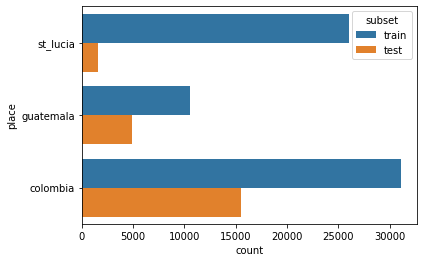

In [19]:
sns.countplot(data=df, y="place", hue="subset")

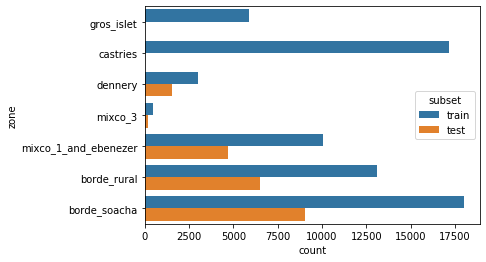

In [18]:
sns.countplot(data=df, y="zone", hue="subset")

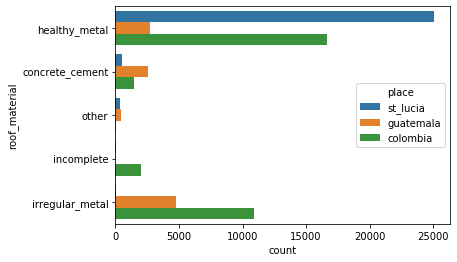

In [10]:
sns.countplot(data=df, y="roof_material", hue="place")

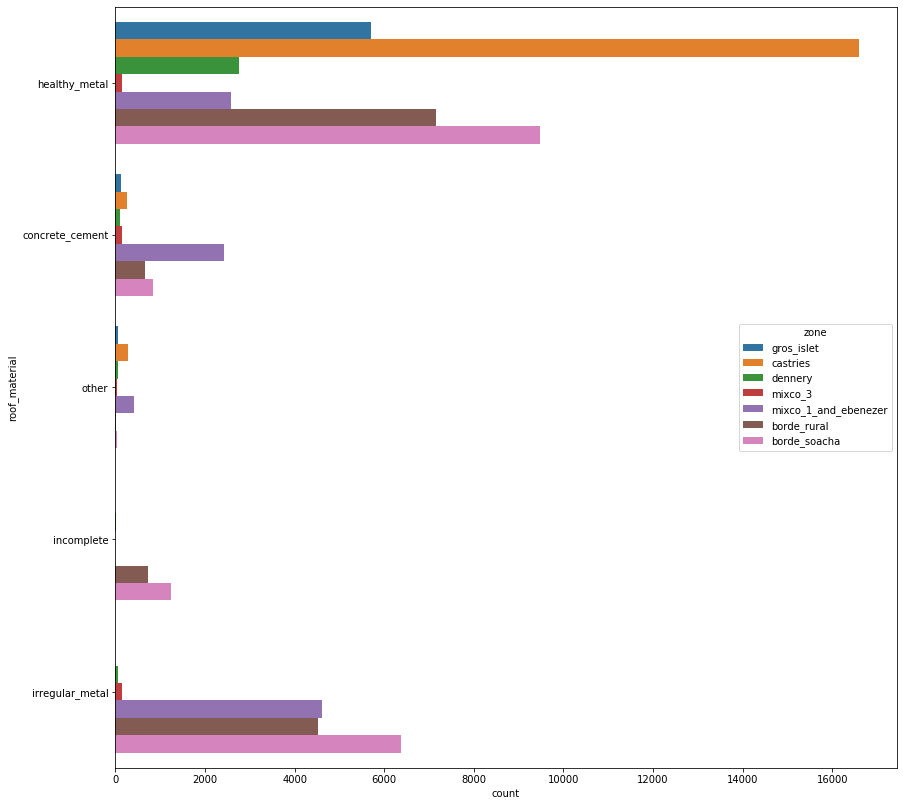

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
sns.countplot(data=df, y="roof_material", hue="zone", ax=ax)

In [11]:
categories = df["roof_material"].unique().tolist()
colors = ["blue", "red", "green", "orange", "gray"]
cat_to_color = dict(zip(categories, colors))
df["color"] = df["roof_material"].map(cat_to_color)

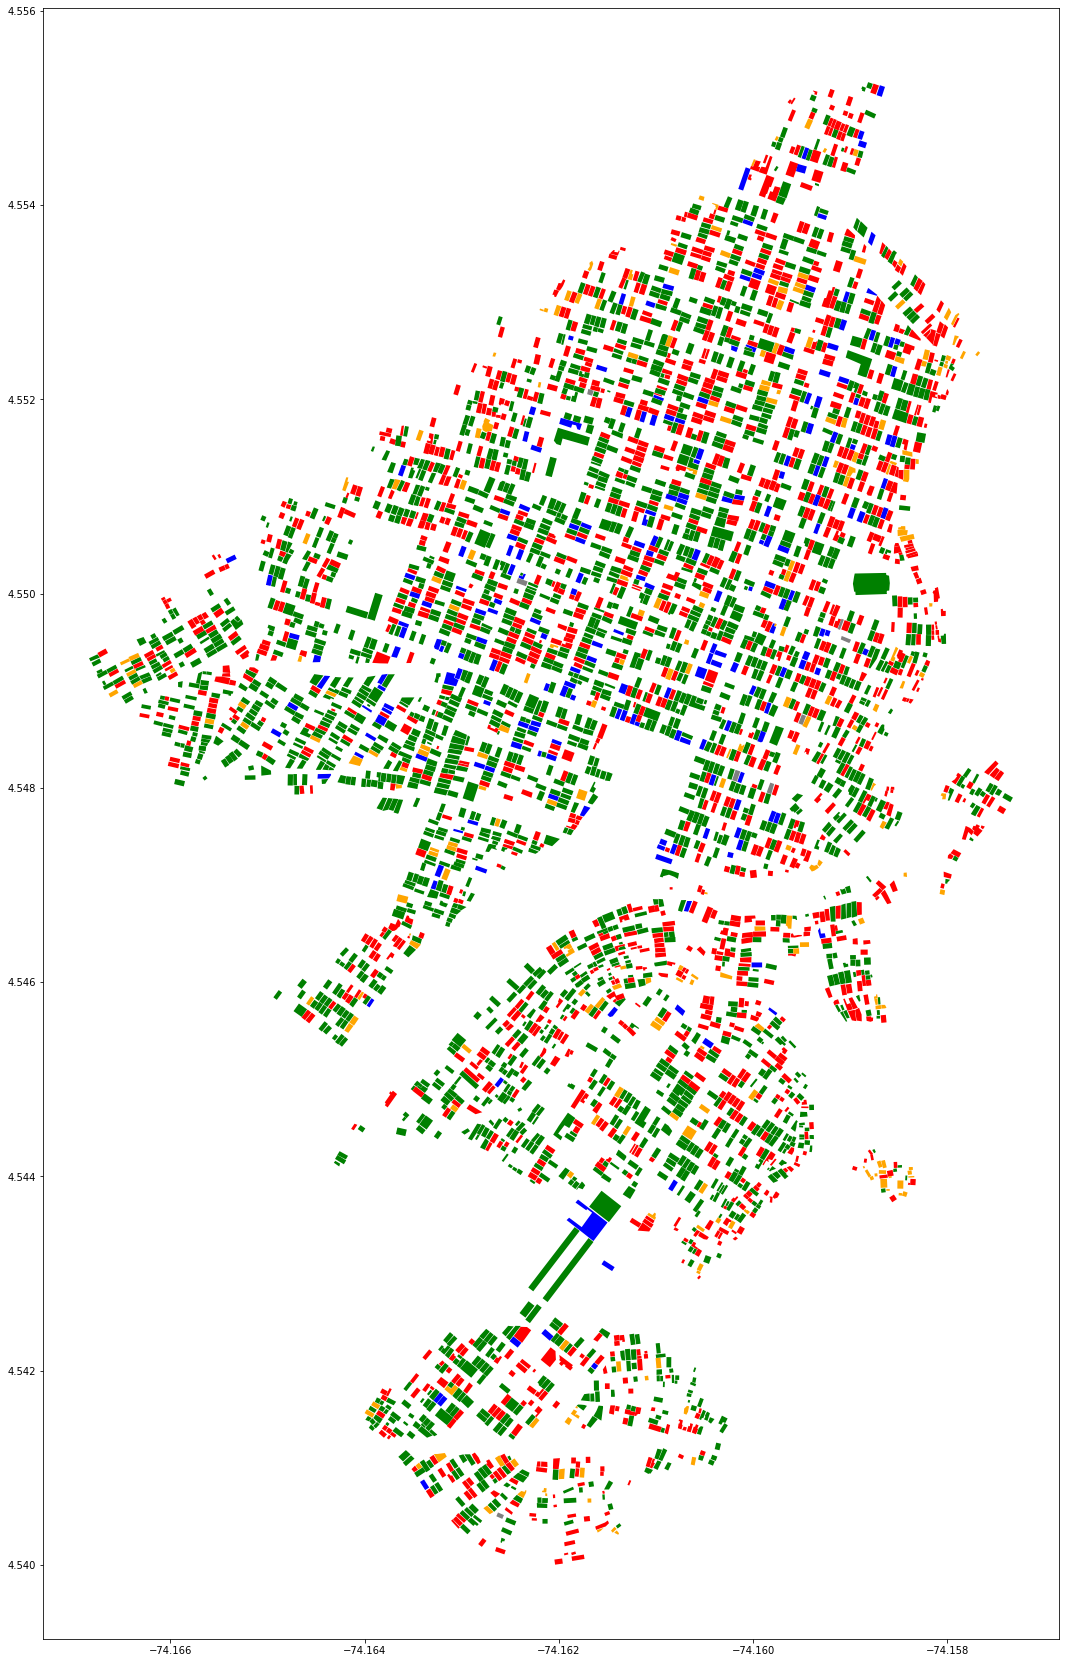

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(80, 30))
df.plot(color=df["color"].tolist(), ax=ax)

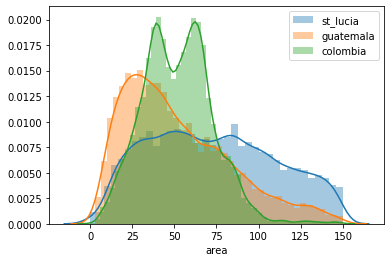

In [14]:
for c in df["place"].unique():
    ds = df.loc[df["place"]==c, "area"]
    ds = ds[ds<150]
    sns.distplot(ds, label=c)
plt.legend()

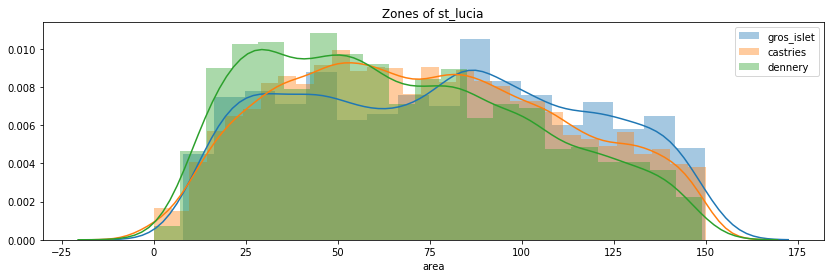

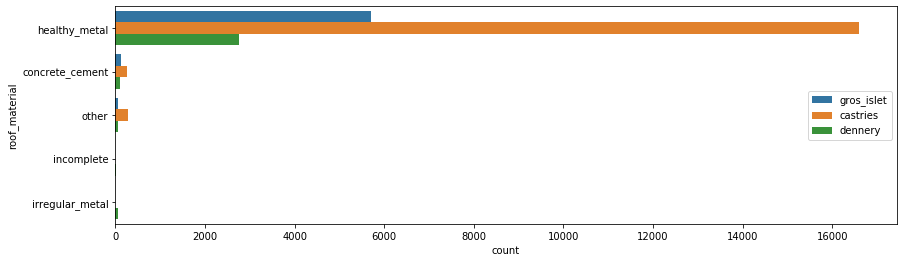

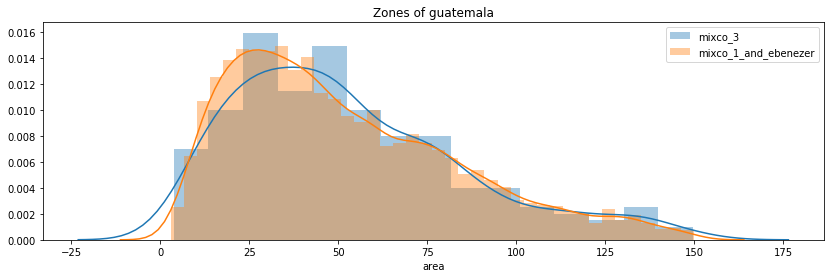

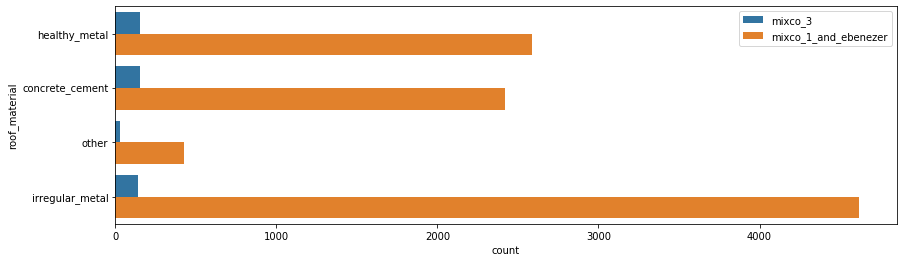

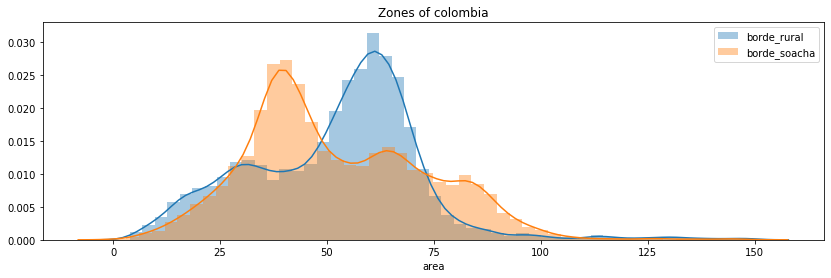

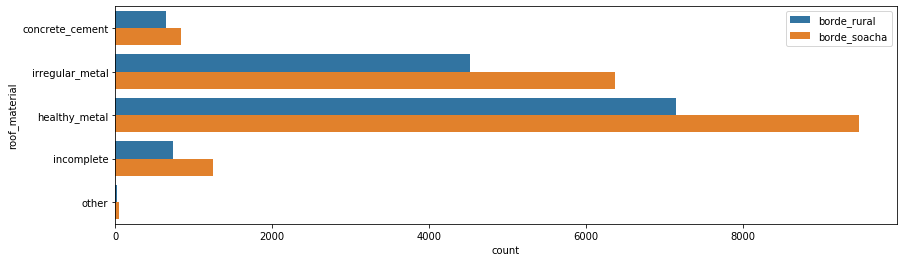

In [25]:
for p in df["place"].unique():
    fig, ax = plt.subplots(1, 1, figsize=(14, 4))
    for c in df.loc[df["place"]==p, "zone"].unique():
        ds = df.loc[(df["place"]==p)&(df["zone"]==c), "area"]
        ds = ds[ds<150]
        sns.distplot(ds, label=c, ax=ax)
    ax.set_title(f"Zones of {p}")
    ax.legend(loc='best')
    plt.show()
    fig, ax = plt.subplots(1, 1, figsize=(14, 4))
    df_place = df[df["place"]==p]
    sns.countplot(data=df_place, y="roof_material", hue="zone", ax=ax)
    ax.legend(loc='best')
    plt.show()

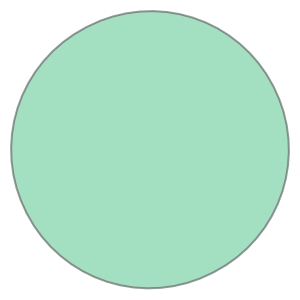

In [154]:
neighborhood = df.within(row["geometry"].buffer(50))

In [155]:
neighborhood.sum()

6

In [28]:
radius = 50

In [30]:
df_sample = df.sample(n=int(1e3)).copy()
df_sample[f"num_neighbors_{radius}"] = df_sample["geometry"].progress_apply(lambda x:\
                                                                            df.within(x.buffer(radius)).sum())



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:00<02:52,  5.78it/s]

  0%|          | 3/1000 [00:00<03:43,  4.46it/s]

  0%|          | 4/1000 [00:01<04:18,  3.85it/s]

  0%|          | 5/1000 [00:01<04:42,  3.52it/s]

  1%|          | 6/1000 [00:01<04:52,  3.40it/s]

  1%|          | 7/1000 [00:02<05:01,  3.30it/s]

  1%|          | 8/1000 [00:02<05:06,  3.24it/s]

  1%|          | 9/1000 [00:02<05:03,  3.26it/s]

  1%|          | 10/1000 [00:02<05:07,  3.22it/s]

  1%|          | 11/1000 [00:03<05:05,  3.24it/s]

  1%|          | 12/1000 [00:03<05:04,  3.25it/s]

  1%|▏         | 13/1000 [00:03<05:06,  3.22it/s]

  1%|▏         | 14/1000 [00:04<05:03,  3.25it/s]

  2%|▏         | 15/1000 [00:04<05:00,  3.28it/s]

  2%|▏         | 16/1000 [00:04<04:59,  3.28it/s]

  2%|▏         | 17/1000 [00:05<04:55,  3.32it/s]

  2%|▏         | 18/1000 [00:05<05:00,  3.27it/s]

  2%|▏         | 19/1000 [00:05<05:00,  3.26it/s]

  2%|▏         | 20/1000 [00:06<04:56,  3.31it

 28%|██▊       | 285/1000 [01:29<03:33,  3.35it/s]

 29%|██▊       | 286/1000 [01:30<03:34,  3.32it/s]

 29%|██▊       | 287/1000 [01:30<03:34,  3.33it/s]

 29%|██▉       | 288/1000 [01:30<03:33,  3.33it/s]

 29%|██▉       | 289/1000 [01:30<03:33,  3.32it/s]

 29%|██▉       | 290/1000 [01:31<03:36,  3.28it/s]

 29%|██▉       | 291/1000 [01:31<03:35,  3.30it/s]

 29%|██▉       | 292/1000 [01:31<03:34,  3.30it/s]

 29%|██▉       | 293/1000 [01:32<03:34,  3.30it/s]

 29%|██▉       | 294/1000 [01:32<03:32,  3.32it/s]

 30%|██▉       | 295/1000 [01:32<03:31,  3.33it/s]

 30%|██▉       | 296/1000 [01:33<03:31,  3.32it/s]

 30%|██▉       | 297/1000 [01:33<03:31,  3.33it/s]

 30%|██▉       | 298/1000 [01:33<03:32,  3.31it/s]

 30%|██▉       | 299/1000 [01:34<03:30,  3.33it/s]

 30%|███       | 300/1000 [01:34<03:34,  3.26it/s]

 30%|███       | 301/1000 [01:34<03:32,  3.29it/s]

 30%|███       | 302/1000 [01:34<03:31,  3.30it/s]

 30%|███       | 303/1000 [01:35<03:30,  3.31it/s]

 30%|███    

 57%|█████▋    | 567/1000 [02:53<02:08,  3.36it/s]

 57%|█████▋    | 568/1000 [02:54<02:08,  3.37it/s]

 57%|█████▋    | 569/1000 [02:54<02:08,  3.35it/s]

 57%|█████▋    | 570/1000 [02:54<02:07,  3.36it/s]

 57%|█████▋    | 571/1000 [02:55<02:08,  3.35it/s]

 57%|█████▋    | 572/1000 [02:55<02:08,  3.34it/s]

 57%|█████▋    | 573/1000 [02:55<02:07,  3.35it/s]

 57%|█████▋    | 574/1000 [02:55<02:07,  3.35it/s]

 57%|█████▊    | 575/1000 [02:56<02:06,  3.35it/s]

 58%|█████▊    | 576/1000 [02:56<02:07,  3.33it/s]

 58%|█████▊    | 577/1000 [02:56<02:07,  3.32it/s]

 58%|█████▊    | 578/1000 [02:57<02:07,  3.32it/s]

 58%|█████▊    | 579/1000 [02:57<02:06,  3.33it/s]

 58%|█████▊    | 580/1000 [02:57<02:06,  3.33it/s]

 58%|█████▊    | 581/1000 [02:58<02:06,  3.32it/s]

 58%|█████▊    | 582/1000 [02:58<02:05,  3.34it/s]

 58%|█████▊    | 583/1000 [02:58<02:04,  3.34it/s]

 58%|█████▊    | 584/1000 [02:58<02:04,  3.34it/s]

 58%|█████▊    | 585/1000 [02:59<02:04,  3.34it/s]

 59%|█████▊ 

 85%|████████▍ | 849/1000 [04:21<00:45,  3.28it/s]

 85%|████████▌ | 850/1000 [04:22<00:45,  3.28it/s]

 85%|████████▌ | 851/1000 [04:22<00:45,  3.26it/s]

 85%|████████▌ | 852/1000 [04:22<00:45,  3.26it/s]

 85%|████████▌ | 853/1000 [04:23<00:44,  3.28it/s]

 85%|████████▌ | 854/1000 [04:23<00:44,  3.27it/s]

 86%|████████▌ | 855/1000 [04:23<00:44,  3.28it/s]

 86%|████████▌ | 856/1000 [04:24<00:43,  3.28it/s]

 86%|████████▌ | 857/1000 [04:24<00:43,  3.29it/s]

 86%|████████▌ | 858/1000 [04:24<00:43,  3.29it/s]

 86%|████████▌ | 859/1000 [04:24<00:42,  3.29it/s]

 86%|████████▌ | 860/1000 [04:25<00:42,  3.29it/s]

 86%|████████▌ | 861/1000 [04:25<00:42,  3.29it/s]

 86%|████████▌ | 862/1000 [04:25<00:41,  3.31it/s]

 86%|████████▋ | 863/1000 [04:26<00:41,  3.30it/s]

 86%|████████▋ | 864/1000 [04:26<00:41,  3.31it/s]

 86%|████████▋ | 865/1000 [04:26<00:40,  3.33it/s]

 87%|████████▋ | 866/1000 [04:27<00:40,  3.33it/s]

 87%|████████▋ | 867/1000 [04:27<00:40,  3.32it/s]

 87%|███████

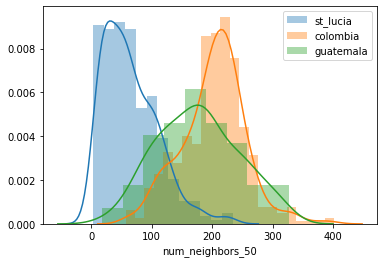

In [33]:
for c in df_sample["place"].unique():
    ds = df_sample.loc[df["place"]==c, f"num_neighbors_{radius}"]
    #ds = ds[ds<150]
    sns.distplot(ds, label=c)
plt.legend()

/home/edu/.local/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/edu/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/edu/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


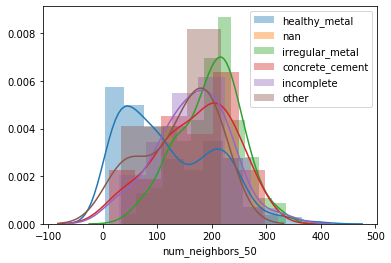

In [34]:
for c in df_sample["roof_material"].unique():
    ds = df_sample.loc[df["roof_material"]==c, f"num_neighbors_{radius}"]
    #ds = ds[ds<150]
    sns.distplot(ds, label=c)
plt.legend()

In [85]:
df["hull"] = df["geometry"]\
.progress_apply(lambda x: x.convex_hull.exterior.minimum_rotated_rectangle)



  0%|          | 0/89634 [00:00<?, ?it/s]

  0%|          | 153/89634 [00:00<00:58, 1527.47it/s]

  0%|          | 323/89634 [00:00<00:56, 1574.72it/s]

  1%|          | 520/89634 [00:00<00:53, 1673.91it/s]

  1%|          | 728/89634 [00:00<00:50, 1777.18it/s]

  1%|          | 924/89634 [00:00<00:48, 1826.36it/s]

  1%|▏         | 1151/89634 [00:00<00:45, 1938.82it/s]

  2%|▏         | 1370/89634 [00:00<00:43, 2007.51it/s]

  2%|▏         | 1579/89634 [00:00<00:43, 2028.68it/s]

  2%|▏         | 1795/89634 [00:00<00:42, 2064.54it/s]

  2%|▏         | 2030/89634 [00:01<00:40, 2140.99it/s]

  3%|▎         | 2242/89634 [00:01<00:42, 2073.20it/s]

  3%|▎         | 2462/89634 [00:01<00:41, 2109.66it/s]

  3%|▎         | 2678/89634 [00:01<00:40, 2121.67it/s]

  3%|▎         | 2906/89634 [00:01<00:40, 2166.38it/s]

  4%|▎         | 3138/89634 [00:01<00:39, 2209.93it/s]

  4%|▍         | 3366/89634 [00:01<00:38, 2228.89it/s]

  4%|▍         | 3594/89634 [00:01<00:38, 2241.47it/s]

  4%|▍  

 38%|███▊      | 34265/89634 [00:13<00:25, 2154.37it/s]

 38%|███▊      | 34486/89634 [00:13<00:25, 2168.29it/s]

 39%|███▊      | 34725/89634 [00:13<00:24, 2228.16it/s]

 39%|███▉      | 34972/89634 [00:13<00:23, 2294.64it/s]

 39%|███▉      | 35228/89634 [00:14<00:22, 2366.81it/s]

 40%|███▉      | 35466/89634 [00:14<00:23, 2343.80it/s]

 40%|███▉      | 35702/89634 [00:14<00:22, 2345.42it/s]

 40%|████      | 35973/89634 [00:14<00:21, 2443.18it/s]

 40%|████      | 36245/89634 [00:14<00:21, 2518.14it/s]

 41%|████      | 36513/89634 [00:14<00:20, 2563.14it/s]

 41%|████      | 36771/89634 [00:14<00:21, 2496.71it/s]

 41%|████▏     | 37050/89634 [00:14<00:20, 2577.99it/s]

 42%|████▏     | 37319/89634 [00:14<00:20, 2608.90it/s]

 42%|████▏     | 37582/89634 [00:14<00:20, 2594.00it/s]

 42%|████▏     | 37843/89634 [00:15<00:20, 2584.80it/s]

 43%|████▎     | 38103/89634 [00:15<00:20, 2569.33it/s]

 43%|████▎     | 38362/89634 [00:15<00:19, 2574.71it/s]

 43%|████▎     | 38638/89634 [0

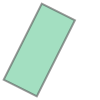

In [121]:
a = df.at[569, "hull"]
display(a)

In [103]:
import rasterio

In [106]:
image_to_res = {p:abs(rasterio.open(p).meta["transform"].e) for p in images}

In [108]:
df["res"] = df["tif"].map(image_to_res)

In [98]:
x, y = b.xy

In [100]:
x

array('d', [2030722.4558372293, 2030722.5077135975, 2030735.3606446132, 2030735.308768245, 2030722.4558372293])

In [122]:
def _dims(x):
    xs, ys = x["hull"].exterior.xy
    width = (np.max(xs) - np.min(xs))/x["res"]
    height = (np.max(ys) - np.min(ys))/x["res"]
    return max(height, width), min(height, width)

(df["width"], df["height"]) = zip(*df.progress_apply(_dims, axis=1))




  0%|          | 0/89634 [00:00<?, ?it/s]


  0%|          | 80/89634 [00:00<01:52, 798.86it/s]


  1%|          | 764/89634 [00:00<01:21, 1086.81it/s]


  2%|▏         | 1521/89634 [00:00<01:00, 1462.56it/s]


  3%|▎         | 2300/89634 [00:00<00:45, 1933.74it/s]


  3%|▎         | 3051/89634 [00:00<00:34, 2487.78it/s]


  4%|▍         | 3828/89634 [00:00<00:27, 3125.07it/s]


  5%|▌         | 4553/89634 [00:00<00:22, 3767.69it/s]


  6%|▌         | 5322/89634 [00:00<00:18, 4448.29it/s]


  7%|▋         | 6151/89634 [00:00<00:16, 5165.75it/s]


  8%|▊         | 6986/89634 [00:01<00:14, 5832.14it/s]


  9%|▊         | 7751/89634 [00:01<00:13, 6124.86it/s]


 10%|▉         | 8558/89634 [00:01<00:12, 6601.02it/s]


 10%|█         | 9382/89634 [00:01<00:11, 7019.17it/s]


 11%|█▏        | 10228/89634 [00:01<00:10, 7396.50it/s]


 12%|█▏        | 11033/89634 [00:01<00:10, 7579.13it/s]


 13%|█▎        | 11894/89634 [00:01<00:09, 7860.47it/s]


 14%|█▍        | 12746/89634 [00:01<00:09,

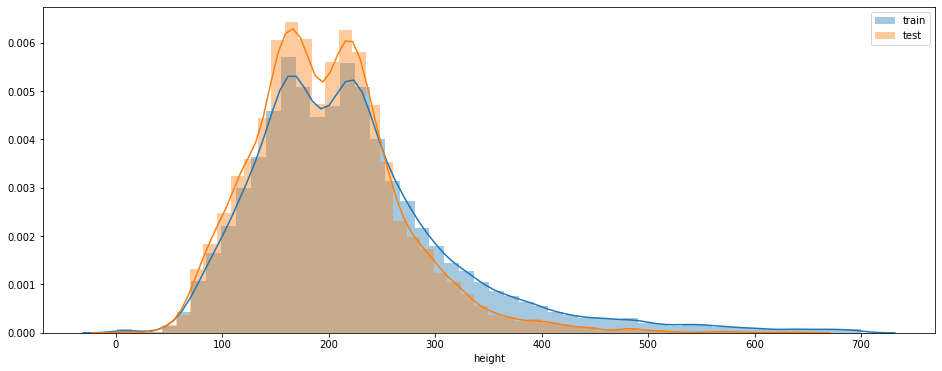

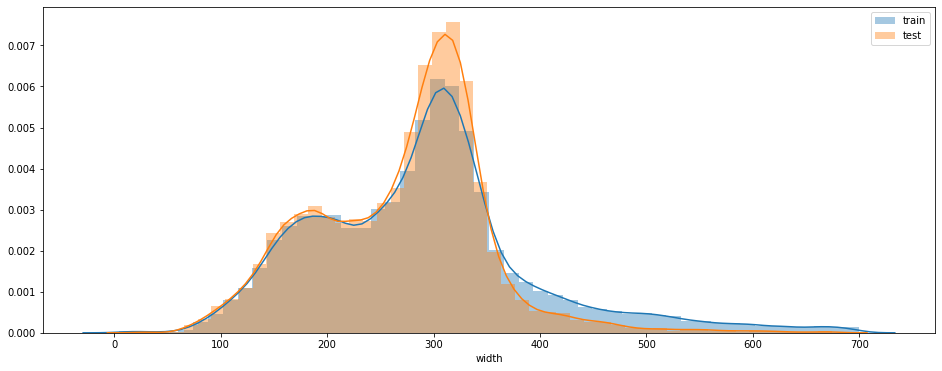

In [132]:
for dim in ["height", "width"]:
    fig, ax = plt.subplots(1, 1, figsize=(16, 6))
    for subset in ["train", "test"]:
        ds = df.loc[df["subset"]==subset, dim]
        ds = ds[ds<700]
        sns.distplot(ds, ax=ax, label=subset)
    ax.legend()
    plt.show()

In [139]:
df["outlier"] = (df["height"] > 400)|(df["width"] > 400)

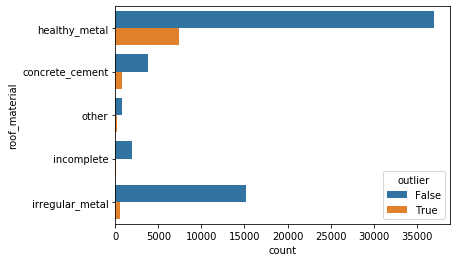

In [141]:
sns.countplot(data=df, y="roof_material", hue="outlier")

In [133]:
df["ratio"] = df["width"]/df["height"]

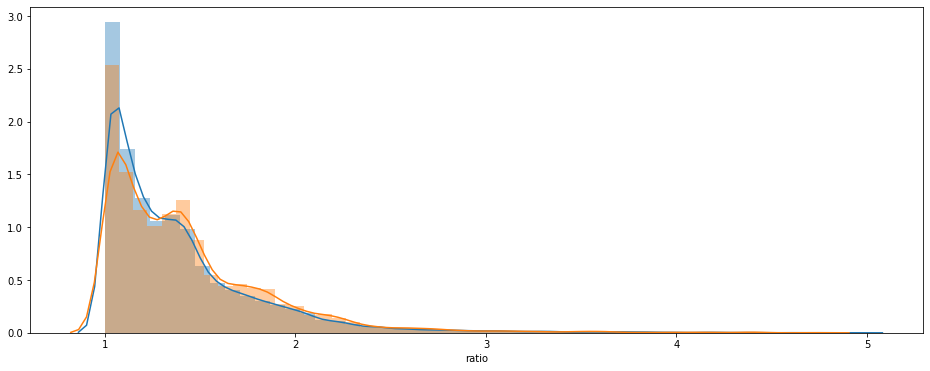

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
for subset in ["train", "test"]:
    ds = df.loc[df["subset"]==subset, "ratio"]
    ds = ds[ds<5]
    sns.distplot(ds, ax=ax, label=subset)

In [136]:
np.median(ds)

1.33340268815189

In [129]:
mean_height = df["height"].median()
mean_width = df["width"].median()

In [130]:
mean_width

291.3763140982936

In [131]:
mean_height

205.1631930813384

In [48]:
zone_to_image = {p.split("/")[-2]:p for p in images}

In [49]:
df["tif"] = df["zone"].map(zone_to_image)

In [50]:
row = df.iloc[0]

In [51]:
row

geometry         POLYGON ((2030877.666464014 1601737.559776141,...
id                                                        7a262f60
path             stac/st_lucia/gros_islet/train-gros_islet.geojson
roof_material                                        healthy_metal
subset                                                       train
verified                                                     False
place                                                     st_lucia
zone                                                    gros_islet
area                                                       236.787
color                                                         blue
tif              stac/st_lucia/gros_islet/gros_islet_ortho-cog.tif
Name: 0, dtype: object

In [57]:
zone_to_crs = {p.split("/")[-2]:xarray.open_rasterio(p).crs for p in images}

In [58]:
zone_to_crs

{'gros_islet': '+init=epsg:32620',
 'castries': '+init=epsg:32620',
 'dennery': '+init=epsg:32620',
 'mixco_3': '+init=epsg:32616',
 'mixco_1_and_ebenezer': '+init=epsg:32616',
 'borde_rural': '+init=epsg:32618',
 'borde_soacha': '+init=epsg:32618'}

In [52]:
raster = xarray.open_rasterio(row["tif"])

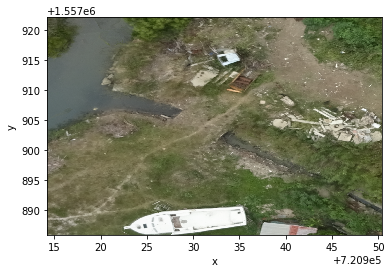

In [139]:
raster[:, 10000:11000, 10000:11000].plot.imshow()